In [1]:
# !curl -o FremontBridge.csv
# https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

In [11]:
import pandas as pd
data = pd.read_csv('../data/Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv',
                  index_col='Date',
                  parse_dates=True) 
data.columns = ['east', 'west']
print(data.head())

                     east  west
Date                           
2018-12-31 23:00:00   7.0   6.0
2018-12-31 22:00:00   3.0   4.0
2018-12-31 21:00:00   7.0   7.0
2018-12-31 20:00:00  12.0  14.0
2018-12-31 19:00:00   9.0   5.0


In [13]:
data['total'] = data['east'] + data['west']
print(data.head())

                     east  west  total
Date                                  
2018-12-31 23:00:00   7.0   6.0   13.0
2018-12-31 22:00:00   3.0   4.0    7.0
2018-12-31 21:00:00   7.0   7.0   14.0
2018-12-31 20:00:00  12.0  14.0   26.0
2018-12-31 19:00:00   9.0   5.0   14.0


In [14]:
print(data.describe())

               east          west         total
count  54735.000000  54735.000000  54735.000000
mean      52.619530     58.300850    110.920380
std       68.034365     84.733147    140.018123
min        0.000000      0.000000      0.000000
25%        7.000000      7.000000     15.000000
50%       29.000000     29.000000     60.000000
75%       70.000000     70.000000    144.000000
max      698.000000    717.000000    957.000000


Text(0, 0.5, 'hourly bicycle count')

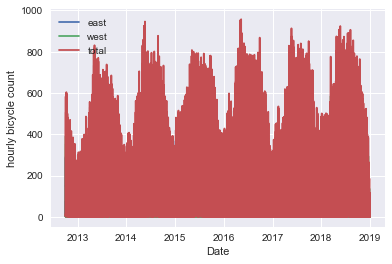

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

data.plot()
plt.ylabel('hourly bicycle count')

Text(0, 0.5, 'weekly bicycle count')

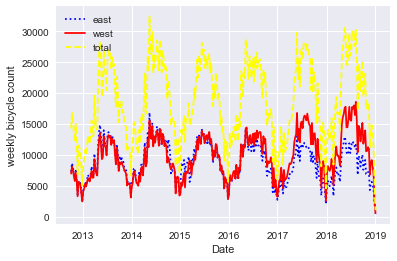

In [18]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '-', '--'], color=['blue','red','yellow'])
plt.ylabel('weekly bicycle count')

Text(0, 0.5, 'mean of 30 days count')

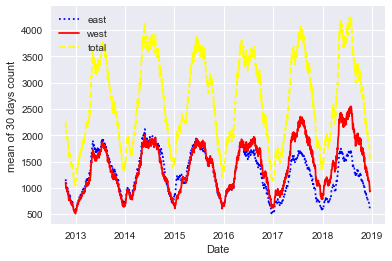

In [19]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).mean().plot(style=[':', '-', '--'], color=['blue','red','yellow'])
plt.ylabel('mean of 30 days count')

Text(0, 0.5, 'sum of 50 days count')

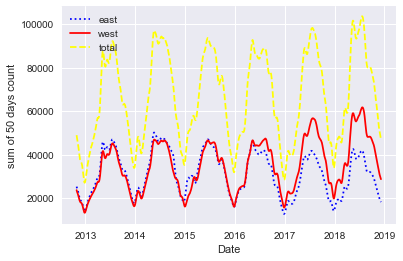

In [20]:
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':', '-', '--'], color=['blue','red','yellow'])
plt.ylabel('sum of 50 days count')

In [26]:
by_time = data.groupby(data.index.time).mean()
by_day = data.groupby(data.index.date).mean()
print(by_time)
print(by_day.head())

                east        west       total
00:00:00    5.108724    6.758878   11.867602
01:00:00    2.844805    3.385357    6.230162
02:00:00    2.043937    2.112039    4.155975
03:00:00    1.591846    1.434897    3.026743
04:00:00    3.536168    3.052170    6.588338
05:00:00   16.513371    9.496274   26.009645
06:00:00   56.962297   34.125822   91.088119
07:00:00  148.630864   78.472161  227.103025
08:00:00  199.615958  119.540552  319.156510
09:00:00  107.428509   79.571491  187.000000
10:00:00   53.432895   44.157018   97.589912
11:00:00   45.712281   39.499561   85.211842
12:00:00   47.303509   42.843860   90.147368
13:00:00   49.569487   46.923279   96.492766
14:00:00   51.523893   53.304253  104.828146
15:00:00   60.606313   72.519071  133.125384
16:00:00   81.961420  139.227093  221.188514
17:00:00  112.820254  269.071021  381.891276
18:00:00   91.067953  172.844805  263.912758
19:00:00   49.877685   79.553266  129.430951
20:00:00   30.756686   44.024989   74.781675
21:00:00  

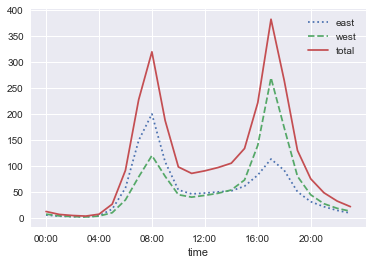

In [25]:
import numpy as np
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'])

            east       west       total
MON    60.127045  69.669223  129.796268
TUES   65.054501  74.654655  139.709156
WED    64.339596  73.848543  138.188139
THURS  61.220603  69.303170  130.523773
FRI    55.193045  62.696241  117.889287
SAT    31.744632  29.930982   61.675613
SUN    30.685254  28.039263   58.724517


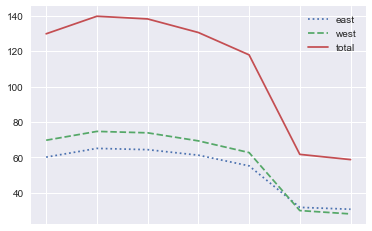

In [28]:
by_weekday = data.groupby(data.index.dayofweek).mean()

by_weekday.index = ['MON','TUES','WED','THURS','FRI','SAT','SUN']
print(by_weekday)
by_weekday.plot(style=[':', '--', '-'])

In [36]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
print(weekend, weekend.shape)    # (54744,)
by_time = data.groupby([weekend, data.index.time]).mean()
print(by_time)
print(by_time.loc['Weekday'])
print(by_time.loc['Weekend'])



['Weekday' 'Weekday' 'Weekday' ... 'Weekday' 'Weekday' 'Weekday'] (54744,)
                        east        west       total
Weekday 00:00:00    4.394107    5.666667   10.060773
        01:00:00    2.282382    2.620012    4.902394
        02:00:00    1.681400    1.640884    3.322284
        03:00:00    1.473297    1.303254    2.776550
        04:00:00    4.256599    3.363413    7.620012
        05:00:00   21.465930   11.969306   33.435236
        06:00:00   76.440147   44.246163  120.686311
        07:00:00  201.414979  103.979128  305.394107
        08:00:00  266.932474  156.499079  423.431553
        09:00:00  133.177518   96.492015  229.669533
        10:00:00   53.550983   44.396192   97.947174
        11:00:00   39.325553   33.990786   73.316339
        12:00:00   39.272113   36.283170   75.555283
        13:00:00   41.457950   40.379988   81.837937
        14:00:00   43.911602   48.954573   92.866176
        15:00:00   57.154696   76.119705  133.274401
        16:00:00   89.43

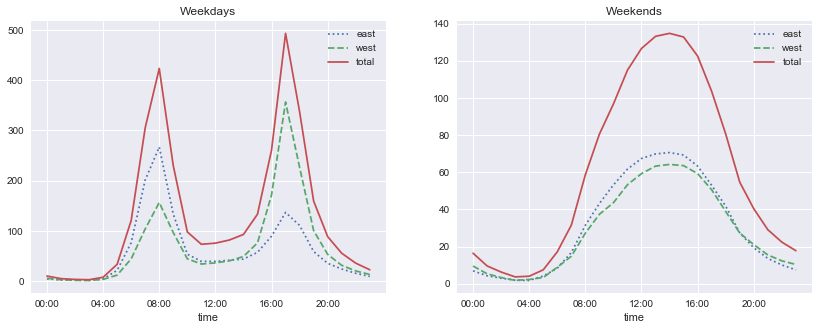

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
hourly_ticks = 4 * 60 * 60 * np.arange(6) # x坐标轴按一天24小时分为六份，每份为4*60*60
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays', xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends', xticks=hourly_ticks, style=[':', '--', '-'])